In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, hamming_loss, classification_report
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
import json
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

# Exploratory Data Analysis Notebook

## Load and Prepare Data

In [3]:
df = pd.read_parquet('GenericMixOfTopic.parquet')

## Basic Dataset Properties
An exploration of the dataset's basic properties

### Dataset Shape

In [4]:
df.shape

(200005, 5)

In [5]:
df.head()

,id,title,topic,topics_with_percentages,text
0,44579372,Julius Julskötare,Mixed,"b'{""Entertainment"":0.67,""Culture"":0.17,""Mass_m...",'Julius Julskötare' (&quot;Julius Christmas ...
1,69360653,Josia Topf,Mixed,"b'{""People"":0.5,""Sports"":0.5,""Academic_discipl...",Infobox athlete | name Josia Topf | fullname...
2,41642068,St. Peter Chaldean Catholic Cathedral (El Cajo...,Mixed,"b'{""Religion"":0.36,""Culture"":0.21,""Time"":0.14,...",St. Peter Cathedral is a Chaldean Catholic C...
3,4351257,Allahabad Address,Mixed,"b'{""History"":0.3,""Government"":0.2,""Philosophy""...","File:Iqbal.jpg|thumb|right| Muhammad Iqbal ,..."
4,648505,Glomerulus (olfaction),Academic_disciplines,"b'{""Academic_disciplines"":1.0,""Business"":0,""Co...",The glomerulus (plural glomeruli) is a spher...


### Missing and Null Values
No missing values found.

In [6]:
df.isnull().sum()

id                         0
title                      0
topic                      0
topics_with_percentages    0
text                       0
dtype: int64

### Duplicates
There are no duplicates in the dataset.

In [7]:
df.duplicated().sum()

0

### Columns, names and range

The name of the 5 columns

In [8]:
df.columns

Index(['id', 'title', 'topic', 'topics_with_percentages', 'text'], dtype='object')

**ID column**

In [9]:
print(f"The min value is: {df['id'].astype(int).min()} and the max value is {df['id'].astype(int).max()}")

The min value is: 766 and the max value is 73935970


**Title Column**

In [10]:
print(f"There are {df['title'].unique().shape[0]} unique titles")
print(f"The shortest title is: {df['title'].apply(len).min()} charachters and the longest title is {df['title'].apply(len).max()} charachters")

There are 200005 unique titles
The shortest title is: 1 charachters and the longest title is 162 charachters


In [11]:
# 5 shortest titles
shortest_titles = df['title'].apply(len).sort_values().head(5)
print("5 Shortest Titles:")
df.iloc[shortest_titles.index, :]


5 Shortest Titles:


,id,title,topic,topics_with_percentages,text
79805,4273681,Ṡ,Concepts,"b'{""Concepts"":1.0,""Academic_disciplines"":0,""Bu...",Ṡ (lowercase: ṡ or ẛ) is a letter of the ext...
61613,3010719,Ȥ,Concepts,"b'{""Concepts"":1.0,""Academic_disciplines"":0,""Bu...","Z with hook, Ȥ ( Lower case|minuscule : ȥ) i..."
3972,258680,Ĥ,Mixed,"b'{""Language"":0.5,""Concepts"":0.5,""Academic_dis...",Ĥ or ĥ is a letter of some extended Latin al...
11164,208171,6,Mathematics,"b'{""Mathematics"":1.0,""Academic_disciplines"":0,...",6 (six) is the natural number following 5 an...
1232,60148151,Ꞩ,Mixed,"b'{""Humanities"":0.5,""Language"":0.5,""Academic_d...","Ꞩ, ꞩ, ẜ (S with oblique stroke) is an extend..."


In [12]:
# 5 longest titles
longest_titles = df['title'].apply(len).sort_values(ascending=False).head(5)
print("\n5 Longest Titles:")
df.iloc[longest_titles.index, :]
print(df.iloc[longest_titles.index, [1,4]].to_markdown(index=False))


5 Longest Titles:
| title                                                                                                                                                              | text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

**Topic Column**

In [13]:
print(f"There are {df['topic'].unique().shape[0]} unique topics")

# 5 most common topics
most_common_topics = df['topic'].value_counts().head(5)
print("\n5 Most Common Topics:")
most_common_topics

There are 40 unique topics

5 Most Common Topics:


topic
Mixed        170000
Knowledge       825
Business        825
Politics        825
Military        825
Name: count, dtype: int64

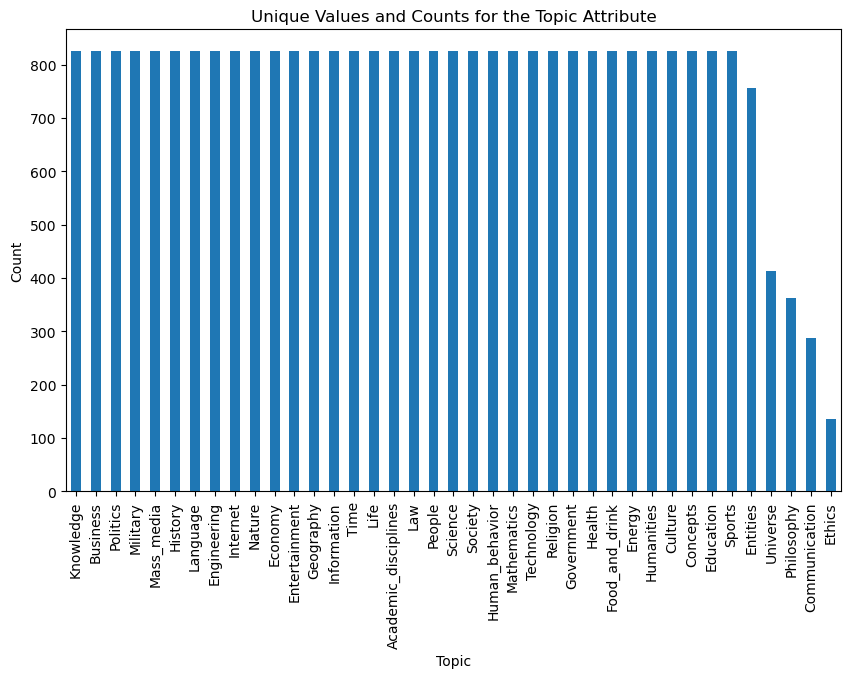

In [14]:
topic_counts = df['topic'].value_counts()
topic_counts = topic_counts.drop("Mixed")

# Create a bar chart
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Unique Values and Counts for the Topic Attribute')
plt.show()

**Topics With Percentages**

In [15]:
df['topics_with_percentages'] = df['topics_with_percentages'].apply(lambda x: json.loads(x))
probability_sums = df['topics_with_percentages'].apply(lambda x: sum(x.values()))
print(f"The min value is: {probability_sums.min()} and the max value is {probability_sums.max()}")

print(f"There are {probability_sums[probability_sums != 1].shape[0]} rows where the sum of the probabilities is not equal to 1")

The min value is: 0.9500000000000001 and the max value is 1.0400000000000005
There are 85619 rows where the sum of the probabilities is not equal to 1


**Text Column**

In [16]:
print(f"There are {df['text'].unique().shape[0]} unique text")
print(f"The shortest text is: {df['text'].apply(len).min()} charachters and the longest text is {df['text'].apply(len).max()} charachters")

There are 200003 unique text
The shortest text is: 73 charachters and the longest text is 406885 charachters


There are 2 duplicates that are the below rows:

In [17]:
df[df.duplicated(subset=['text'], keep=False)].sort_values(by='text')

,id,title,topic,topics_with_percentages,text
35137,69790403,List of number-one albums of 2022 (Spain),Mixed,"{'Entertainment': 0.33, 'History': 0.33, 'Time...",Top 100 España is a record chart published w...
199699,66437291,List of number-one albums of 2021 (Spain),Mixed,"{'Entertainment': 0.33, 'History': 0.33, 'Time...",Top 100 España is a record chart published w...
116130,19260898,Takasu Station (Kōchi),Economy,"{'Economy': 1.0, 'Academic_disciplines': 0, 'B...","is a tram station in Kōchi, Kōchi|Kōchi , Ja..."
180166,19260880,Monju-dōri Station,Economy,"{'Economy': 1.0, 'Academic_disciplines': 0, 'B...","is a tram station in Kōchi, Kōchi|Kōchi , Ja..."


Shortest Texts:

In [18]:
df.iloc[df['text'].apply(len).sort_values(ascending=True).head(5).index, :]

,id,title,topic,topics_with_percentages,text
70683,44857967,"County Road 581 (Citrus County, Florida)",Government,"{'Government': 1.0, 'Academic_disciplines': 0,...",#REDIRECT List of county roads in Citrus Coun...
193003,43449692,454th (City of London) Heavy Anti-Aircraft Reg...,Military,"{'Military': 1.0, 'Academic_disciplines': 0, '...",#REDIRECT 54th (City of London) Heavy Anti-Ai...
6052,273227,Subclass (biology),Life,"{'Life': 1.0, 'Academic_disciplines': 0, 'Busi...",#REDIRECT Class (biology)#Hierarchy of ranks ...
92458,33895594,TAM (theatre),Culture,"{'Culture': 1.0, 'Academic_disciplines': 0, 'B...","TAM (Theater) is a theatre in Krefeld , Nort..."
142672,55814828,ČSA Flight 511,Nature,"{'Nature': 1.0, 'Academic_disciplines': 0, 'Bu...",ČSA Flight 511 may refer to: ČSA Flight 511 (...


In [19]:
# Shortest 5 texts
print(df.iloc[df['text'].apply(len).sort_values(ascending=True).head(5).index, 4].to_markdown(index=False))

| text                                                                                |
|:------------------------------------------------------------------------------------|
| #REDIRECT List of county roads in Citrus County, Florida#County Road 581            |
| #REDIRECT 54th (City of London) Heavy Anti-Aircraft Regiment, Royal Artillery       |
| #REDIRECT Class (biology)#Hierarchy of ranks below and above the level of class     |
| TAM (Theater) is a theatre in Krefeld , North Rhine-Westphalia , Germany . </text>  |
| ČSA Flight 511 may refer to: ČSA Flight 511 (March 1961) ČSA Flight 511 (July 1961) |


# Label Distribution
Looking at the distribution of labels, there is evident label inbalance.
- Some labels have below 10000 instances.
- People Label has more than 70000 Instances.

In [20]:
# Create a new DataFrame containing only the labels
labels_df = pd.DataFrame(df['topics_with_percentages'].tolist())

## Distribution with 0 Threshold

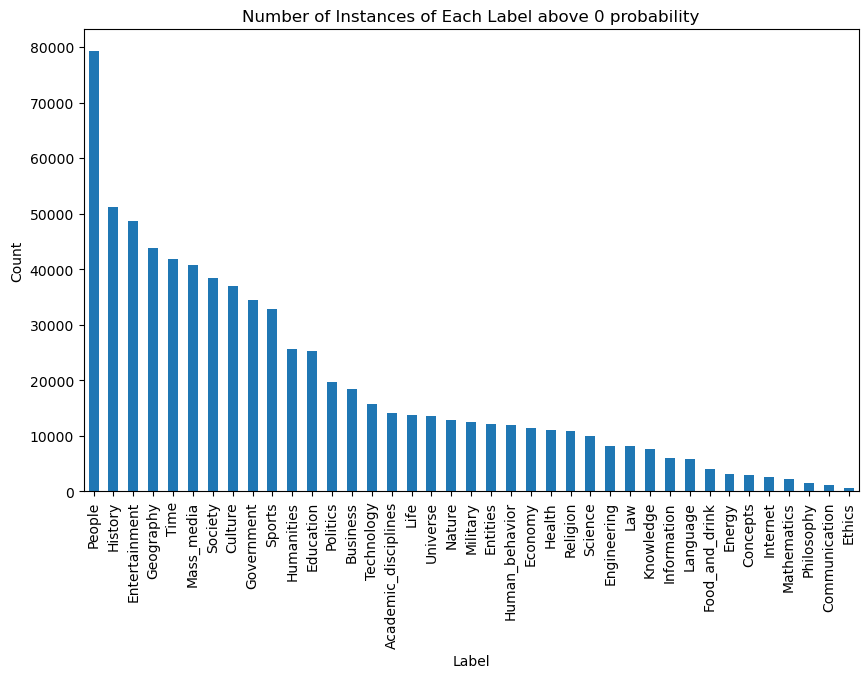

In [21]:
labels_df_above_0 = labels_df.applymap(lambda x: 1 if x > 0 else 0)

sums = labels_df_above_0.sum(axis=0).sort_values(ascending=False)

# bar chart for the number of instances of each label
plt.figure(figsize=(10, 6))
sums.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Instances of Each Label above 0 probability')
plt.show()

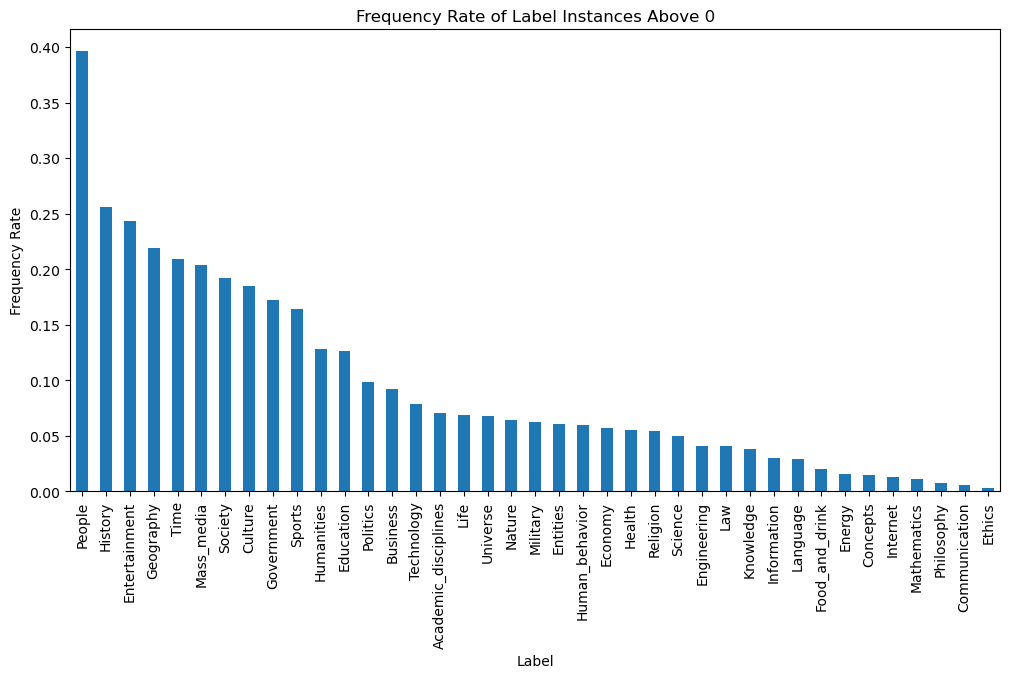

In [22]:
# Calculate the frequency rate
frequency_rate = labels_df_above_0.sum() / len(labels_df_above_0)
frequency_rate = frequency_rate.sort_values(ascending=False)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Instances Above 0')
plt.xlabel('Label')
plt.ylabel('Frequency Rate')
plt.show()

## Distribution with 0.11 Threshold

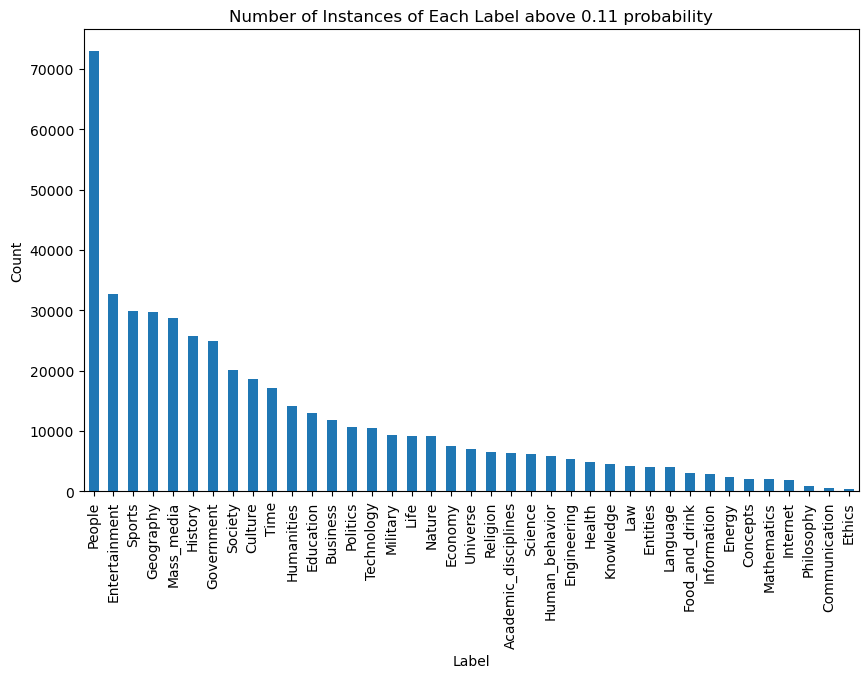

In [23]:
labels_df_above_0_11 = labels_df.applymap(lambda x: 1 if x > 0.11 else 0)

sums = labels_df_above_0_11.sum(axis=0).sort_values(ascending=False)

# bar chart for the number of instances of each label
plt.figure(figsize=(10, 6))
sums.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Instances of Each Label above 0.11 probability')
plt.show()

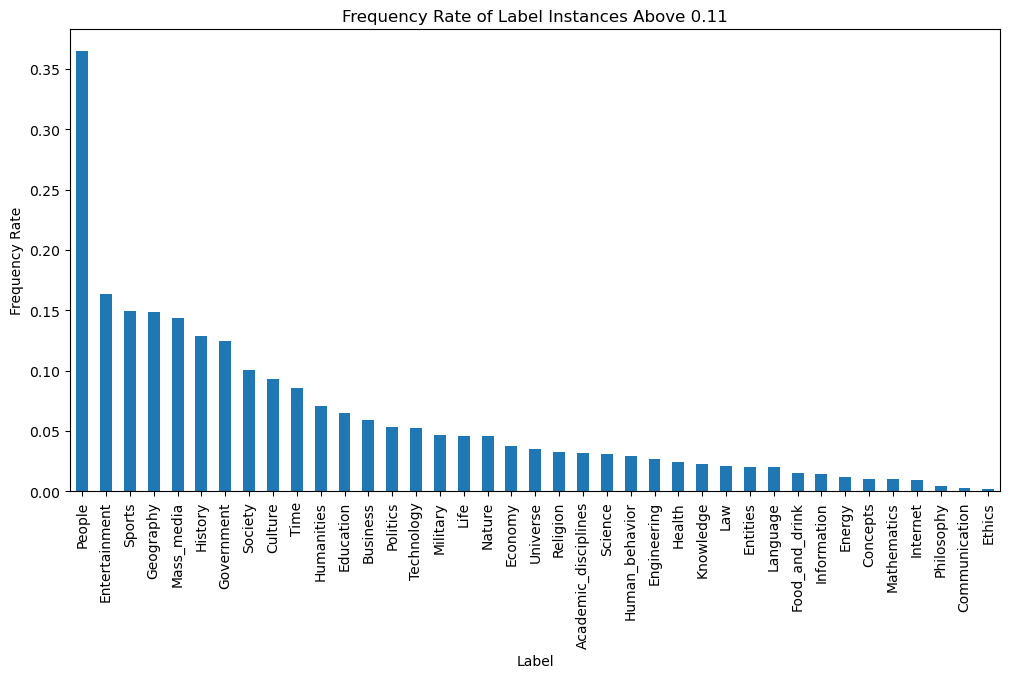

In [24]:
# Calculate the frequency rate
frequency_rate = labels_df_above_0_11.sum() / len(labels_df_above_0_11)
frequency_rate = frequency_rate.sort_values(ascending=False)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Instances Above 0.11')
plt.xlabel('Label')
plt.ylabel('Frequency Rate')
plt.show()

## Distribution with 0.3 Threshold

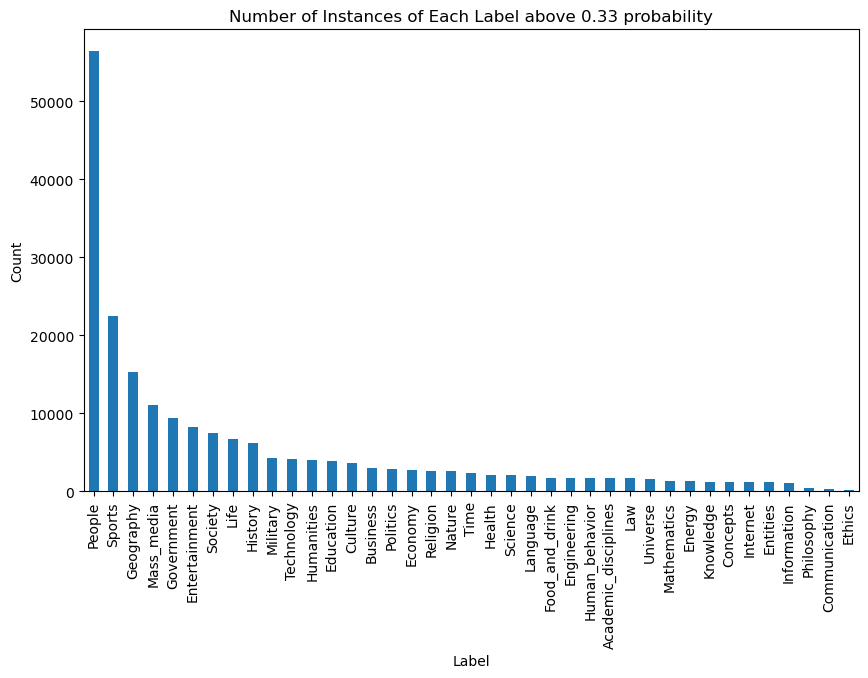

In [25]:
labels_df_above_0_33 = labels_df.applymap(lambda x: 1 if x > 0.33 else 0)

sums = labels_df_above_0_33.sum(axis=0).sort_values(ascending=False)

# bar chart for the number of instances of each label
plt.figure(figsize=(10, 6))
sums.plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Number of Instances of Each Label above 0.33 probability')
plt.show()

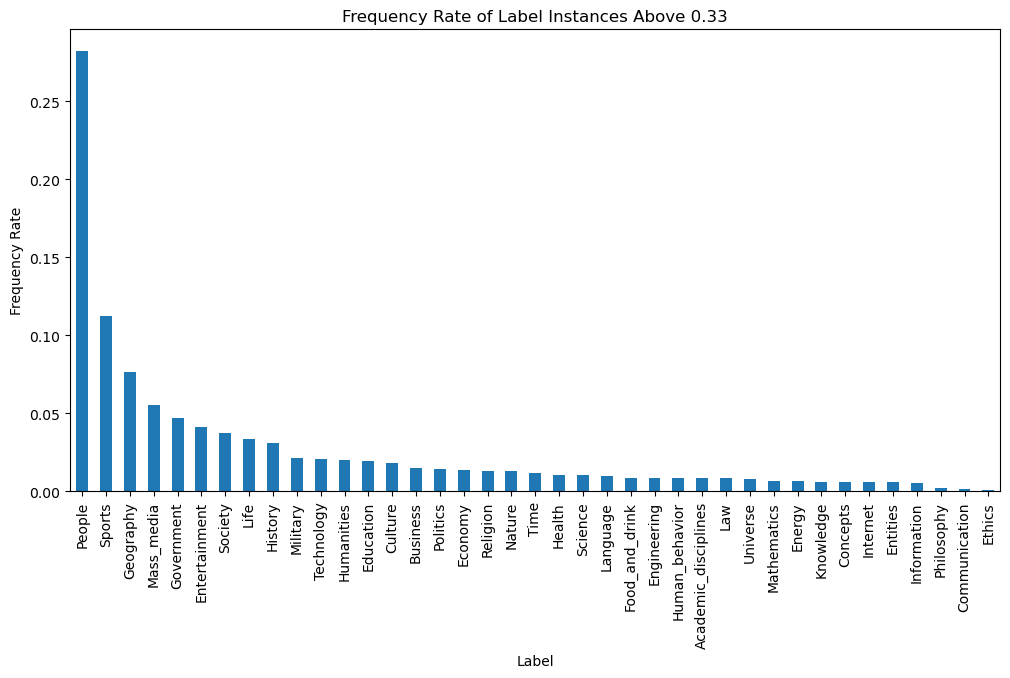

In [26]:
# Calculate the frequency rate
frequency_rate = labels_df_above_0_33.sum() / len(labels_df_above_0_33)
frequency_rate = frequency_rate.sort_values(ascending=False)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Instances Above 0.33')
plt.xlabel('Label')
plt.ylabel('Frequency Rate')
plt.show()

## Label Count Distribution with 0 Threshold

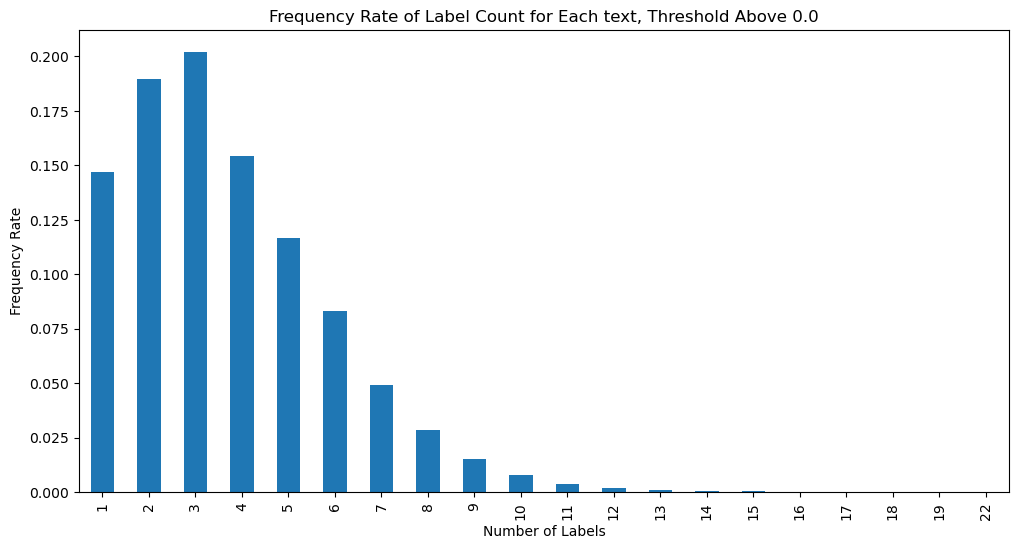

In [34]:
label_count = labels_df_above_0.sum(axis=1).value_counts().sort_index()
frequency_rate = label_count/len(labels_df_above_0)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Count for Each text, Threshold Above 0.0')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency Rate')
plt.show()

## Label Count Distribution with 0.11 Threshold

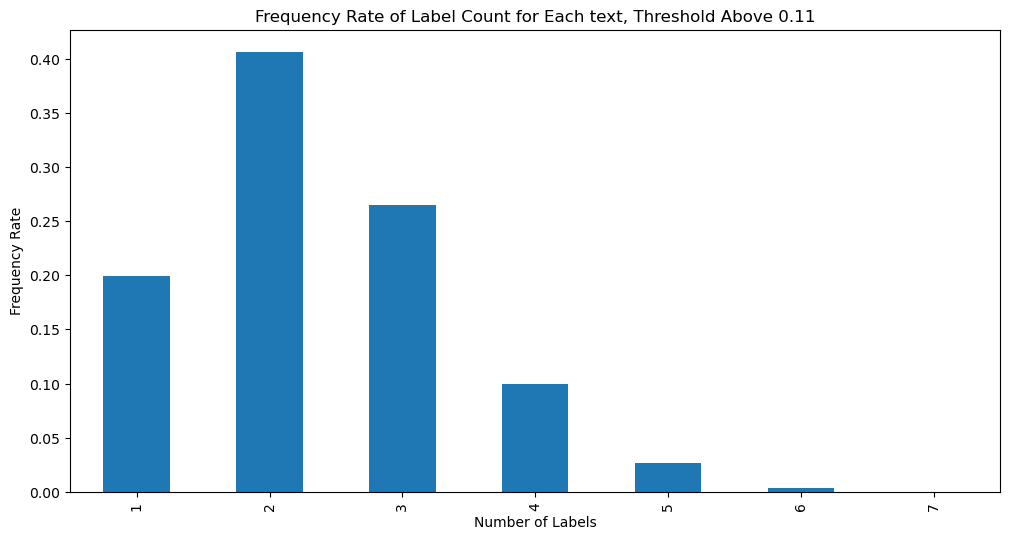

In [35]:
label_count = labels_df_above_0_11.sum(axis=1).value_counts().sort_index()
frequency_rate = label_count/len(labels_df_above_0_11)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Count for Each text, Threshold Above 0.11')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency Rate')
plt.show()

## Label Count Distribution with 0.33 Threshold

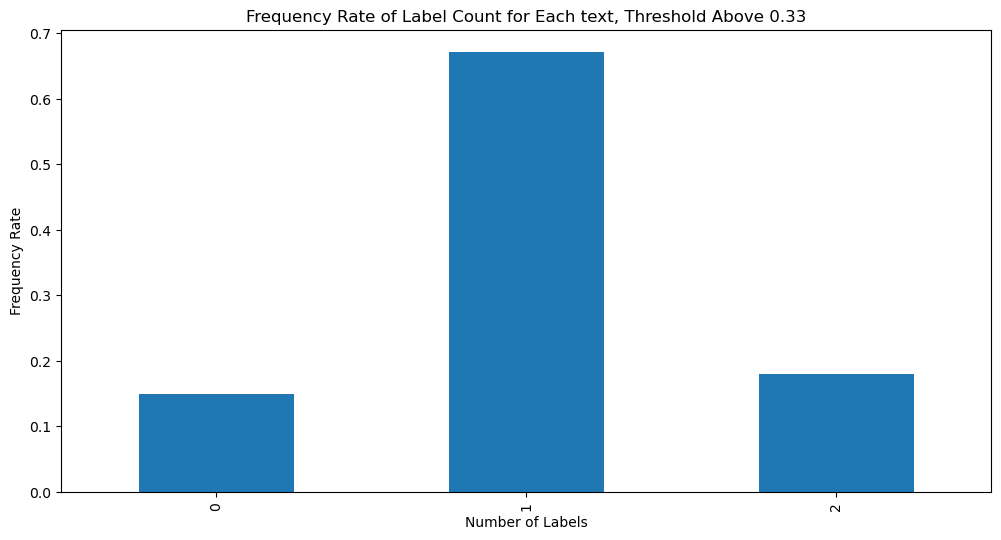

In [36]:
label_count = labels_df_above_0_33.sum(axis=1).value_counts().sort_index()
frequency_rate = label_count/len(labels_df_above_0_33)

# Plot the frequency rate
plt.figure(figsize=(12, 6))
frequency_rate.plot(kind='bar')
plt.title('Frequency Rate of Label Count for Each text, Threshold Above 0.33')
plt.xlabel('Number of Labels')
plt.ylabel('Frequency Rate')
plt.show()

### The distribution of probablites for different labels among the data.

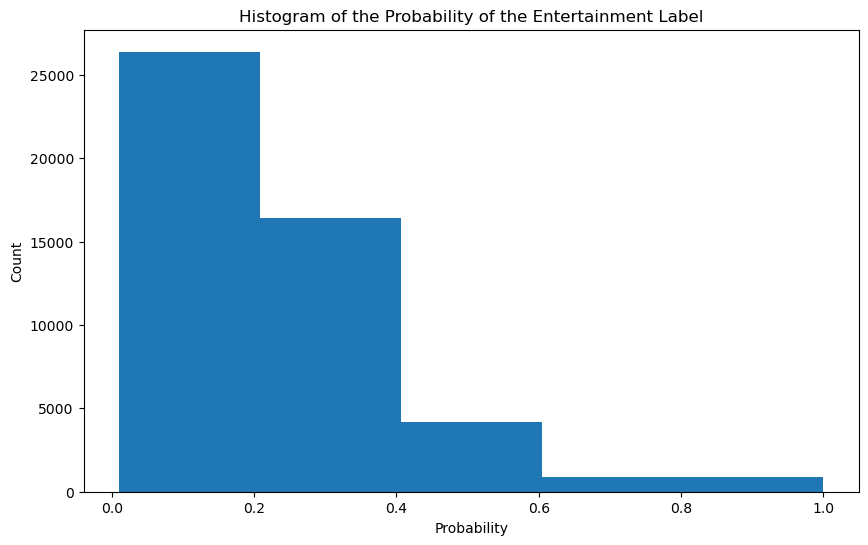

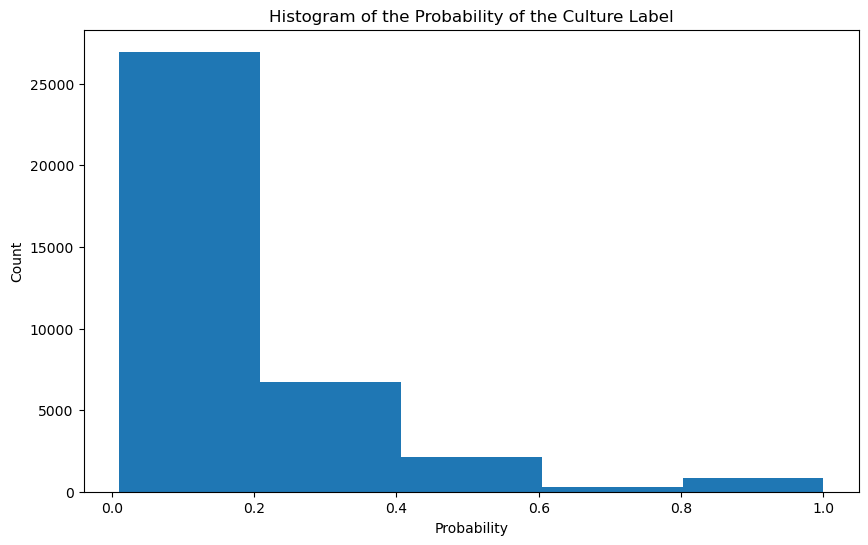

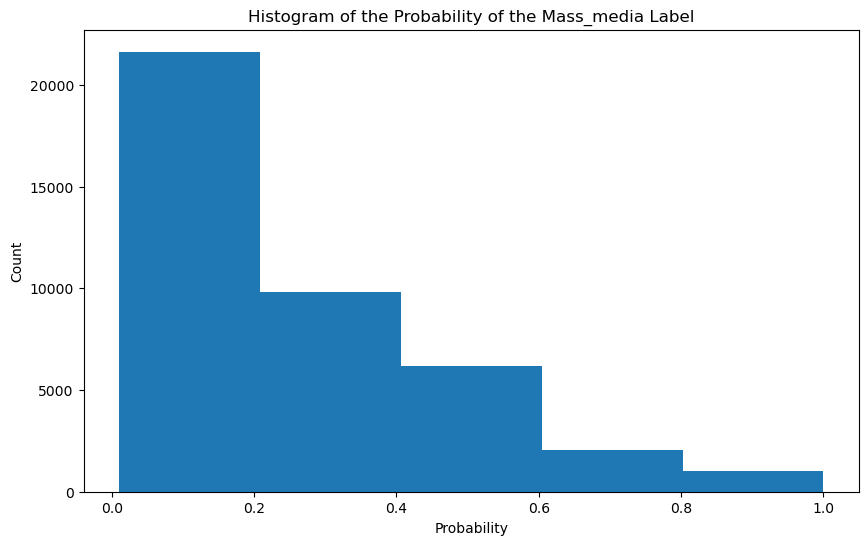

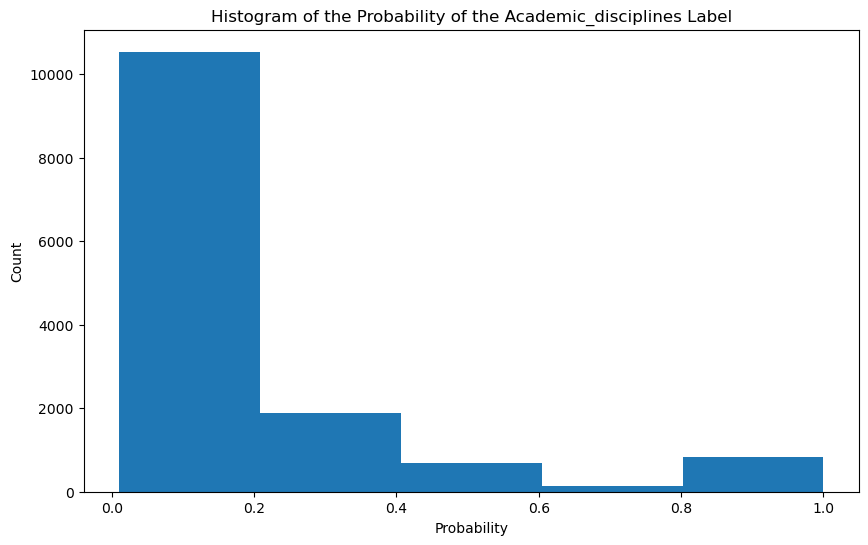

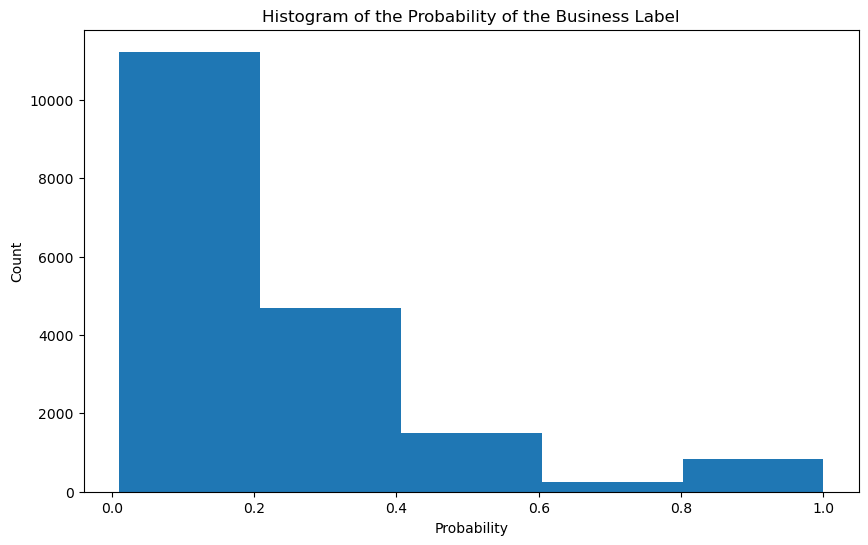

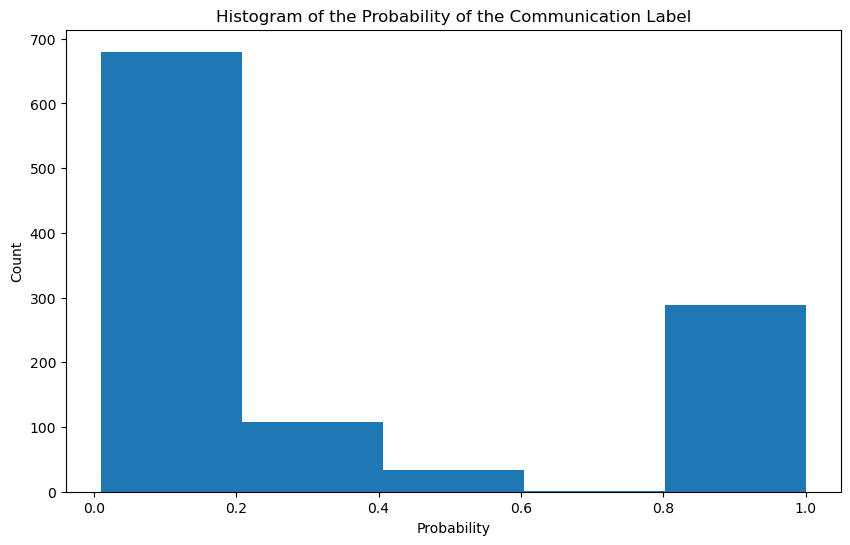

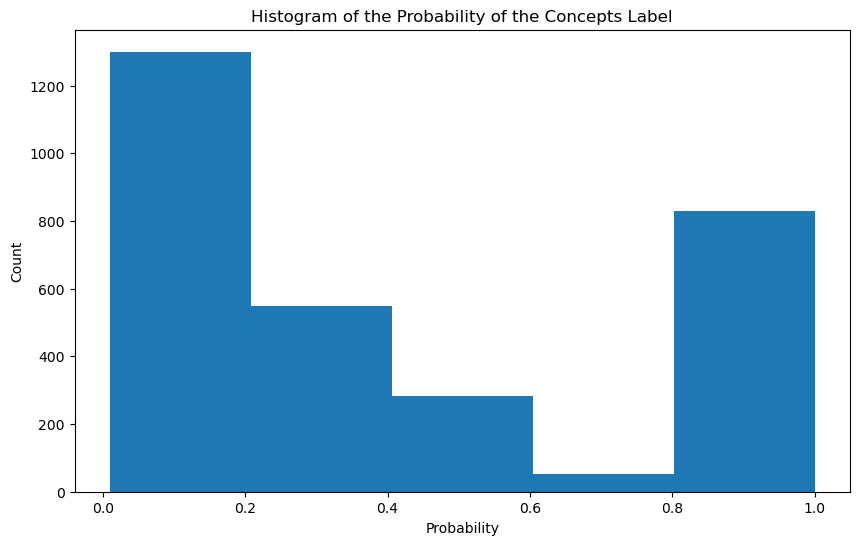

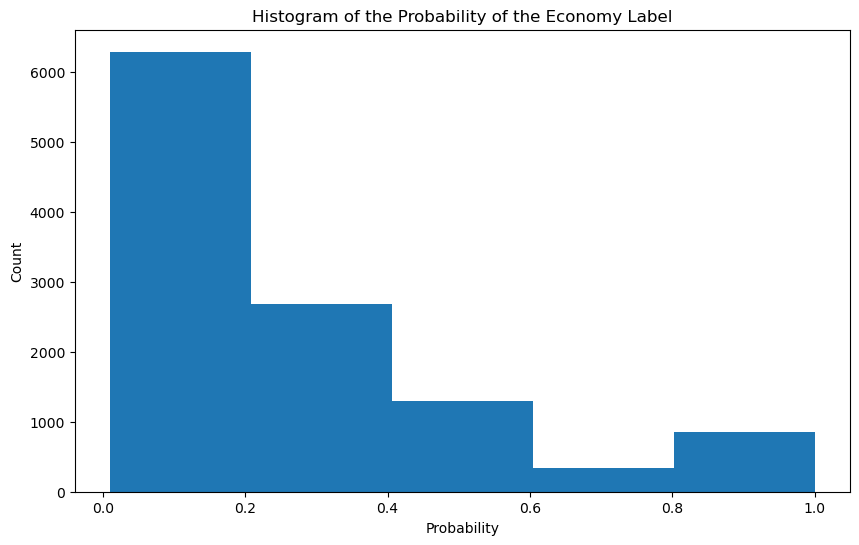

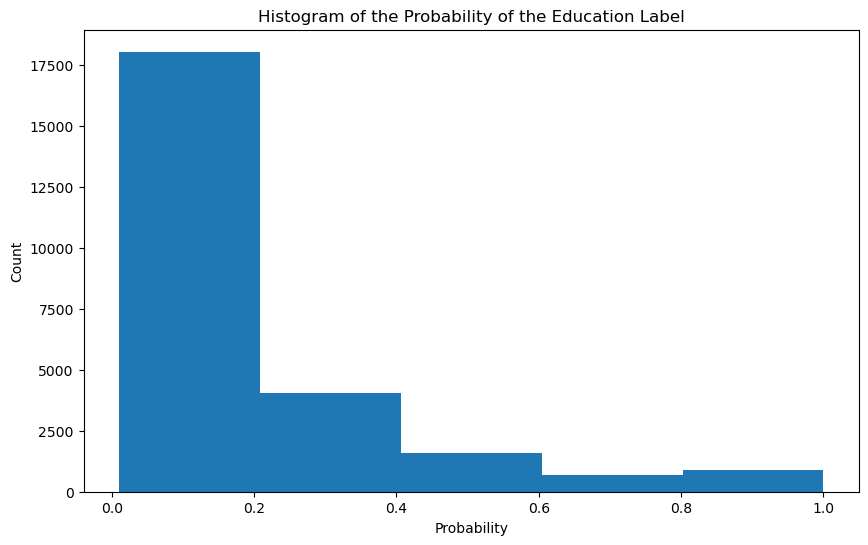

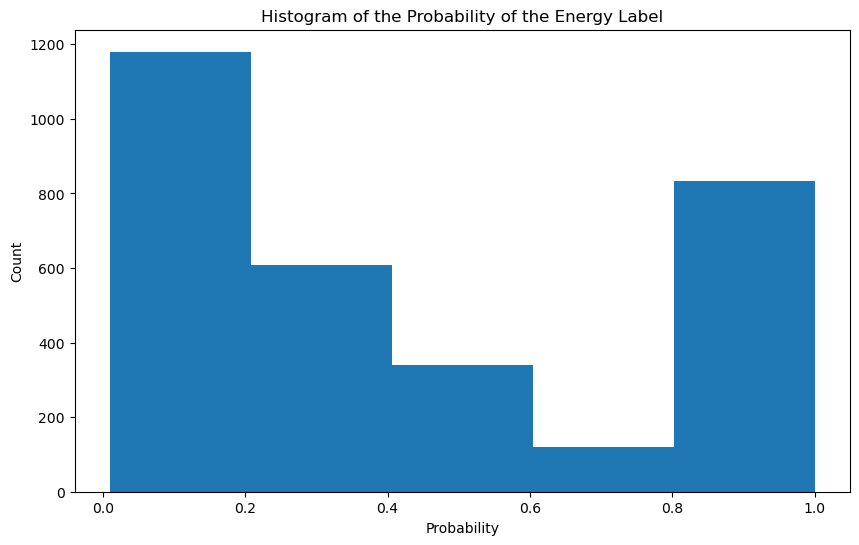

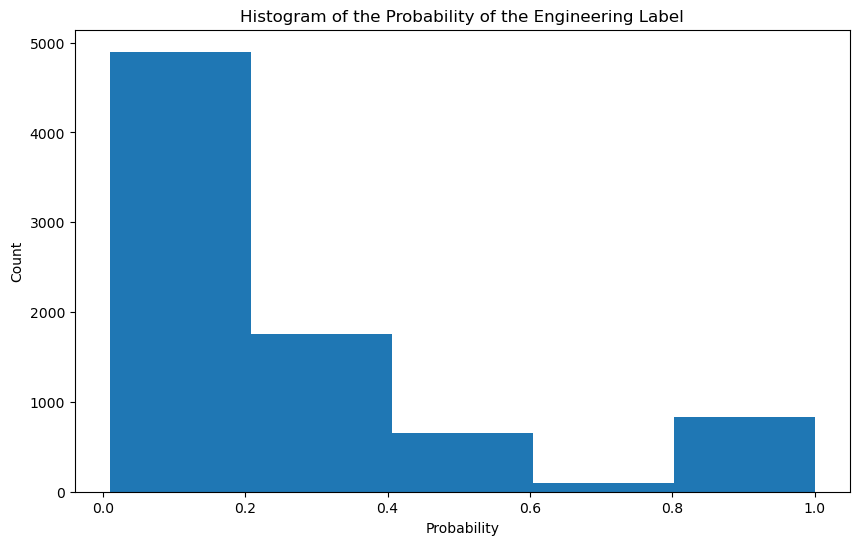

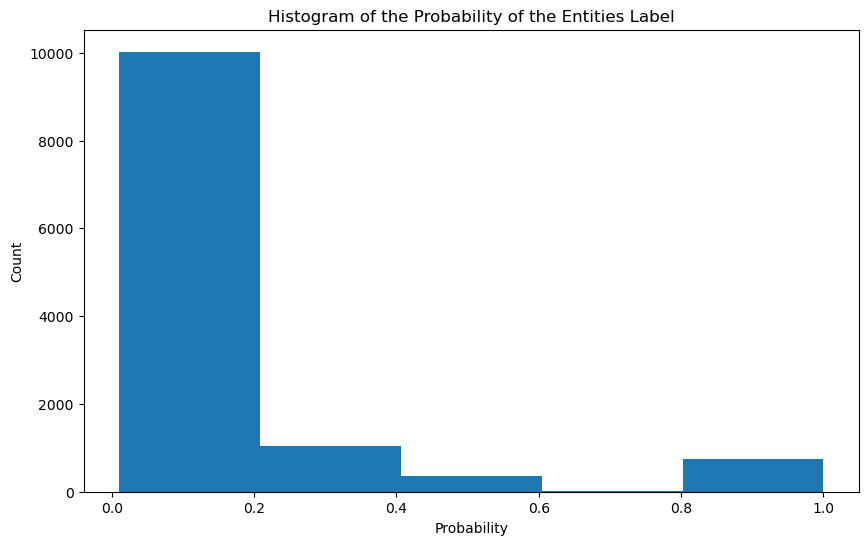

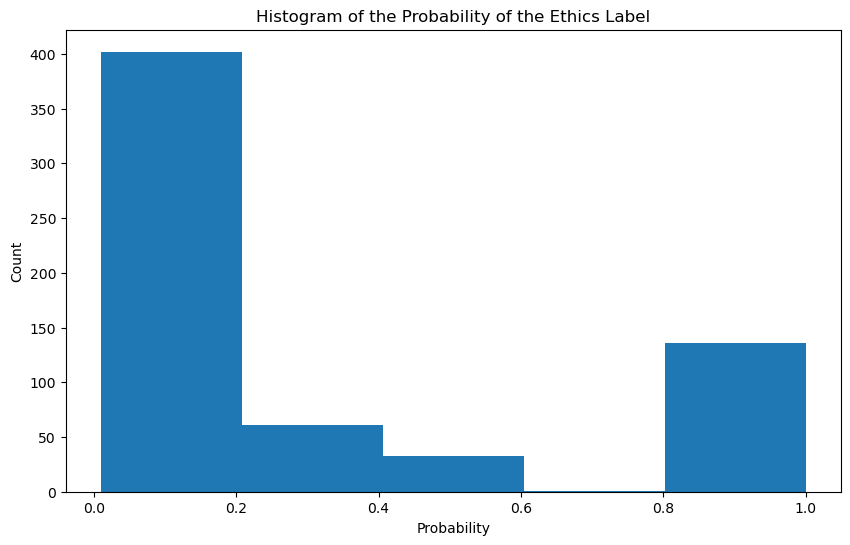

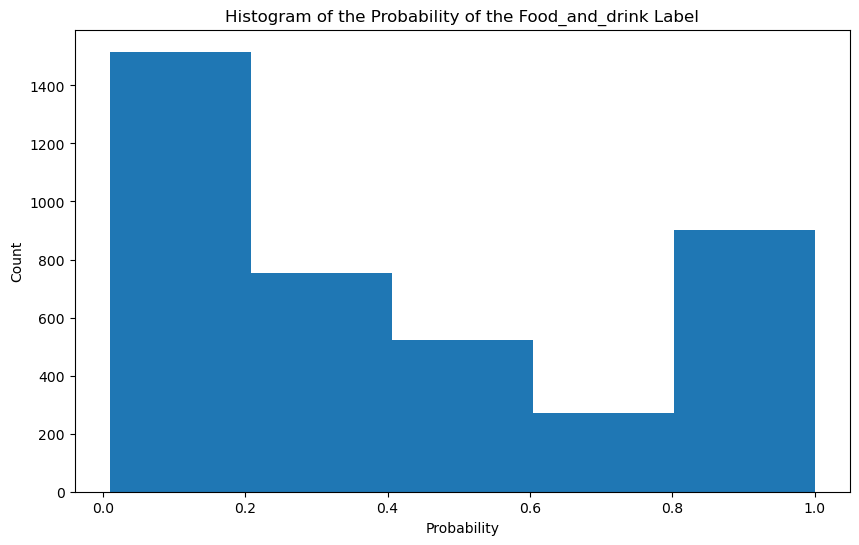

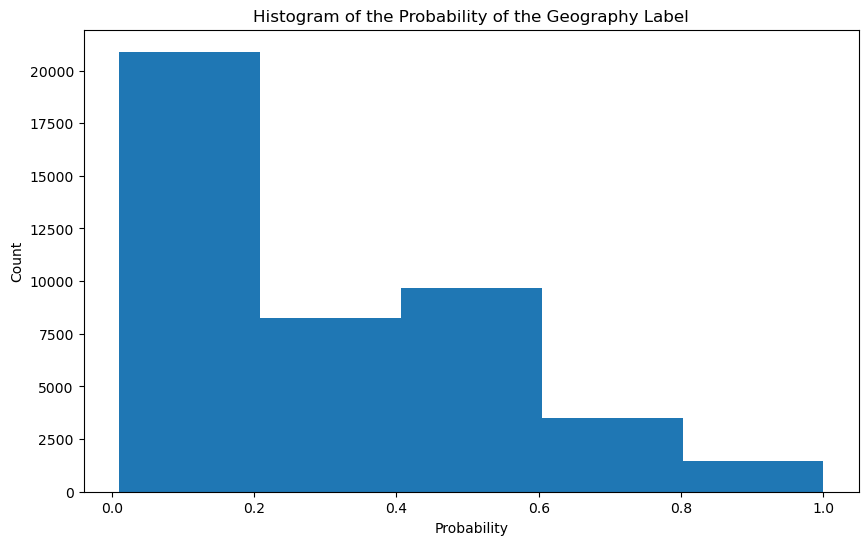

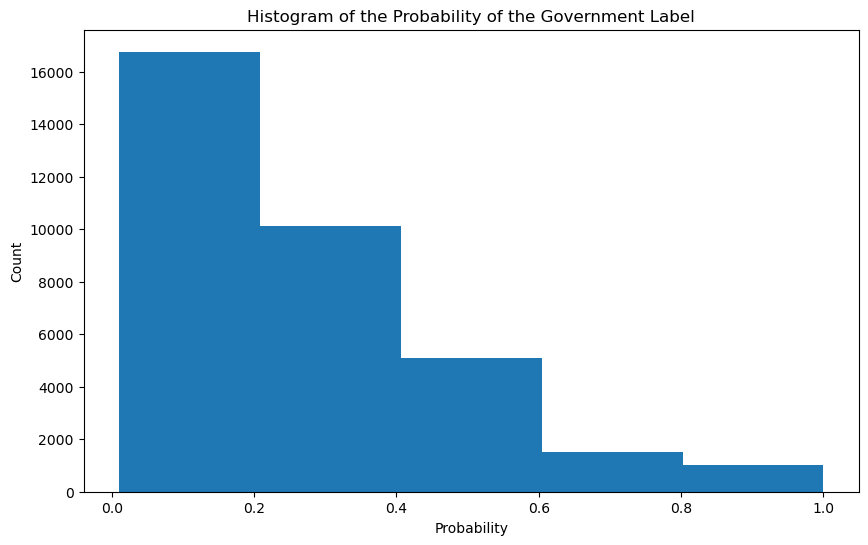

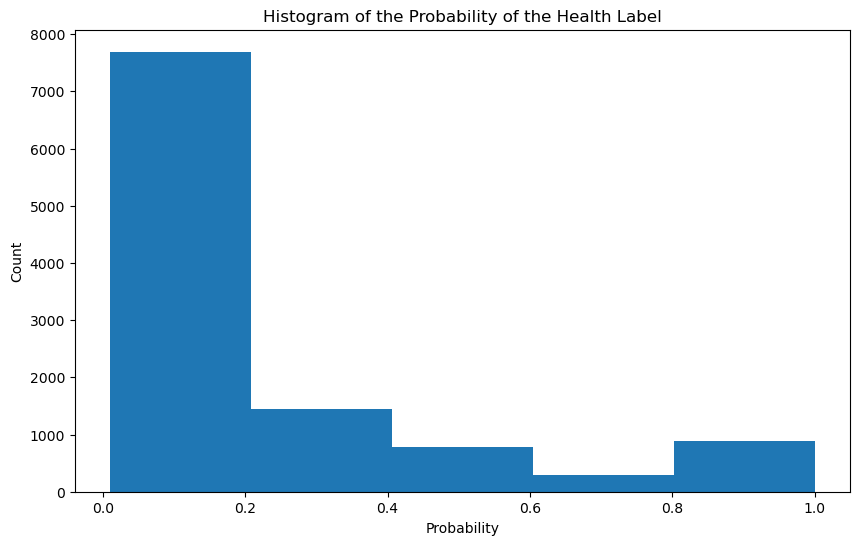

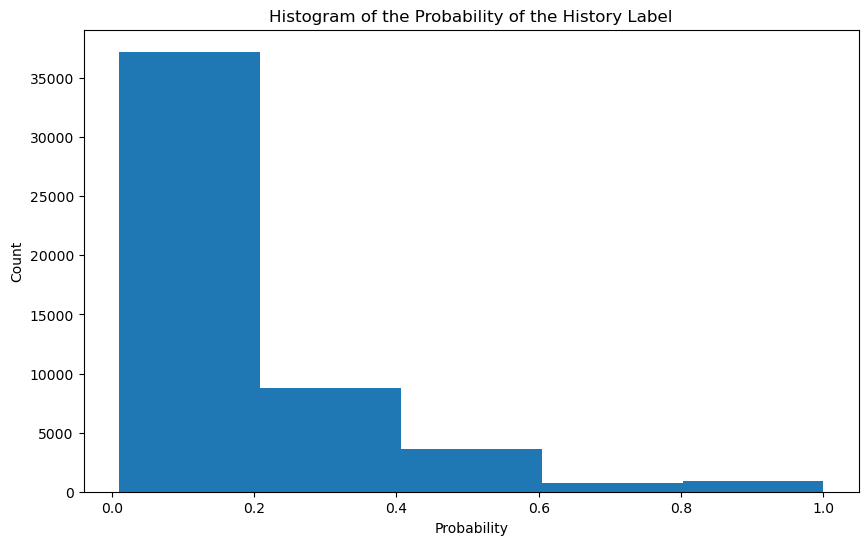

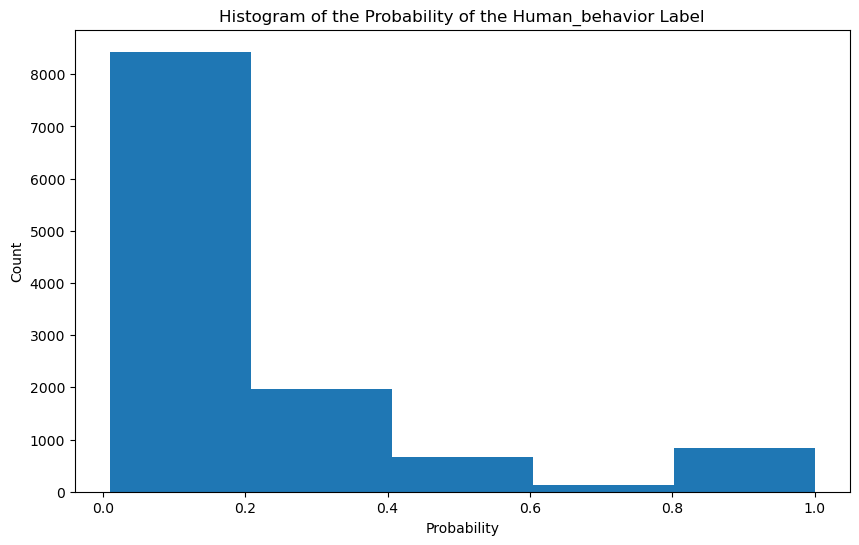

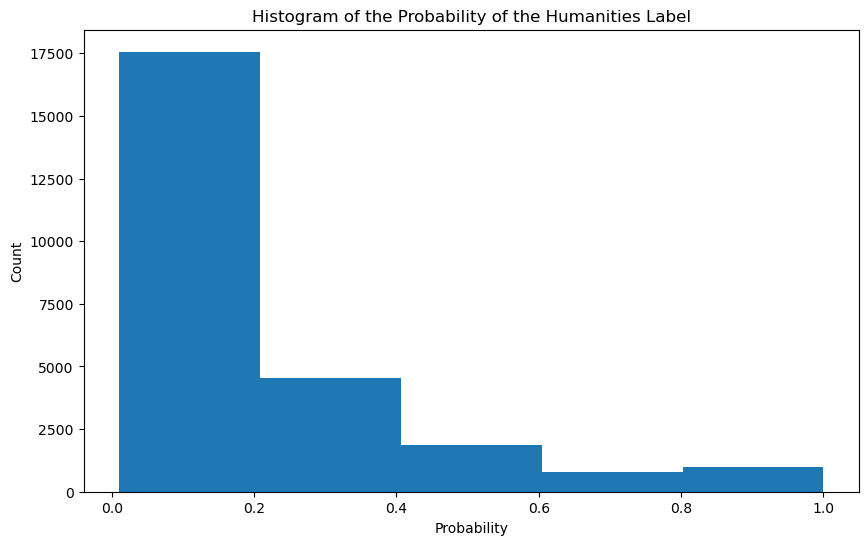

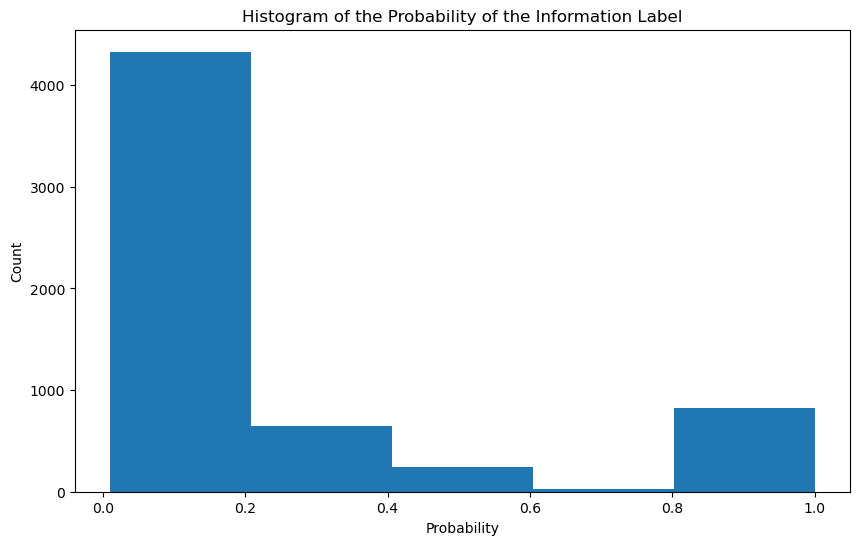

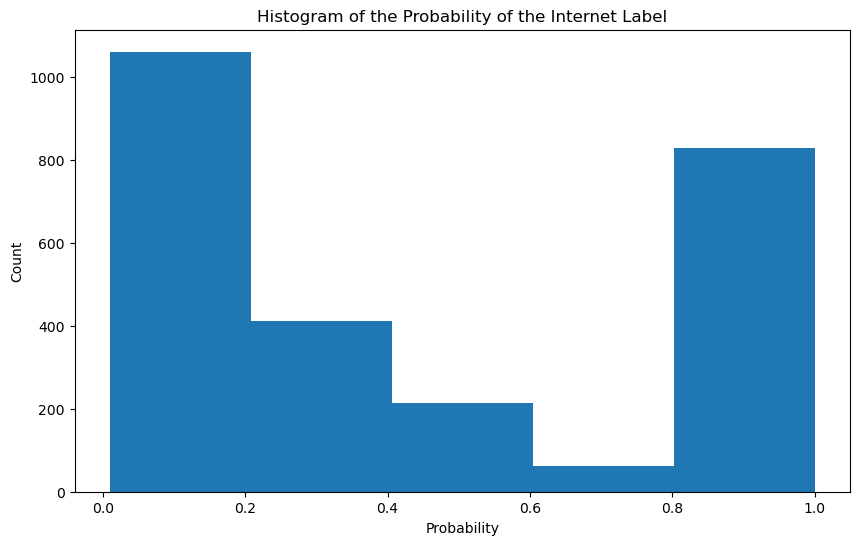

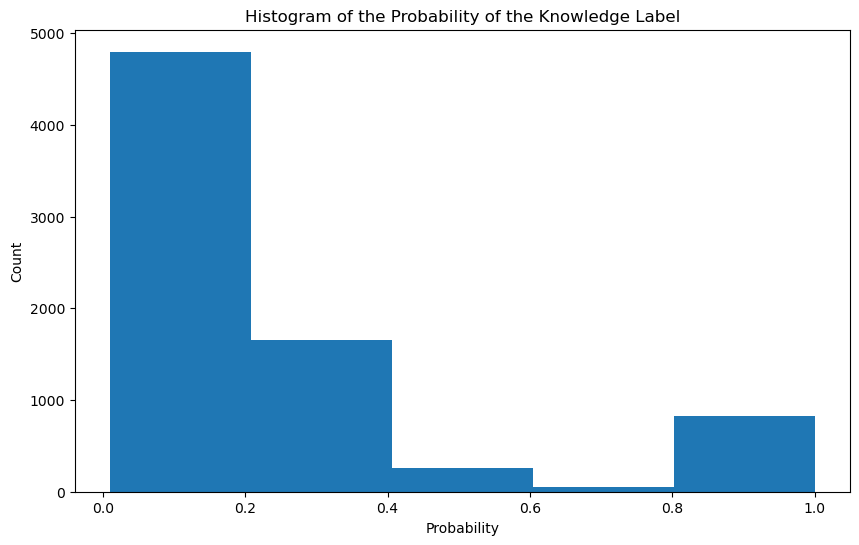

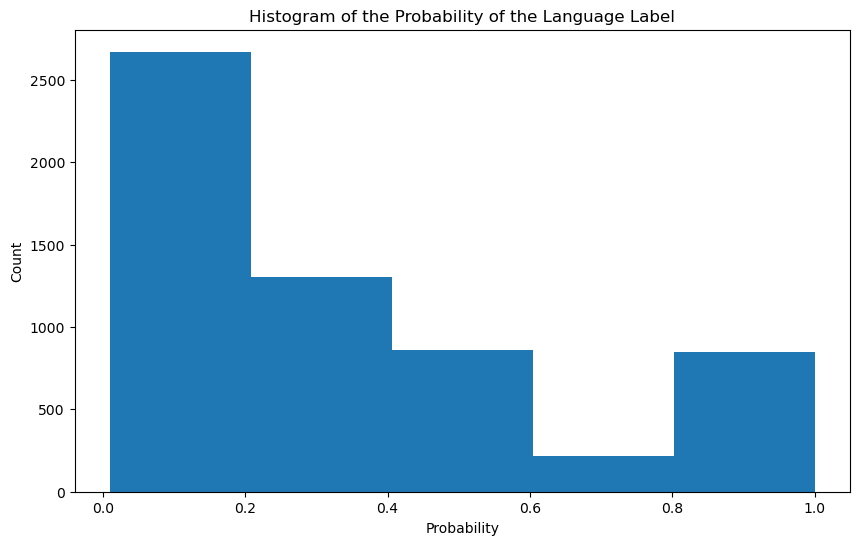

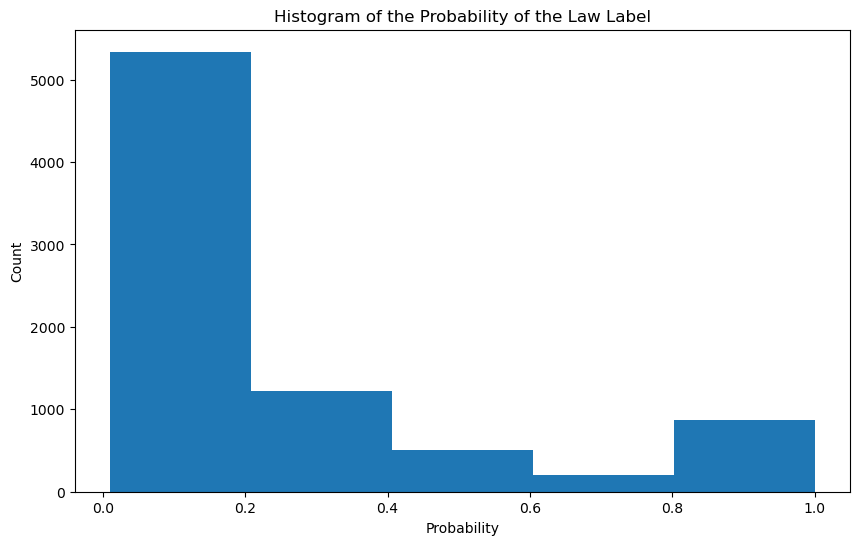

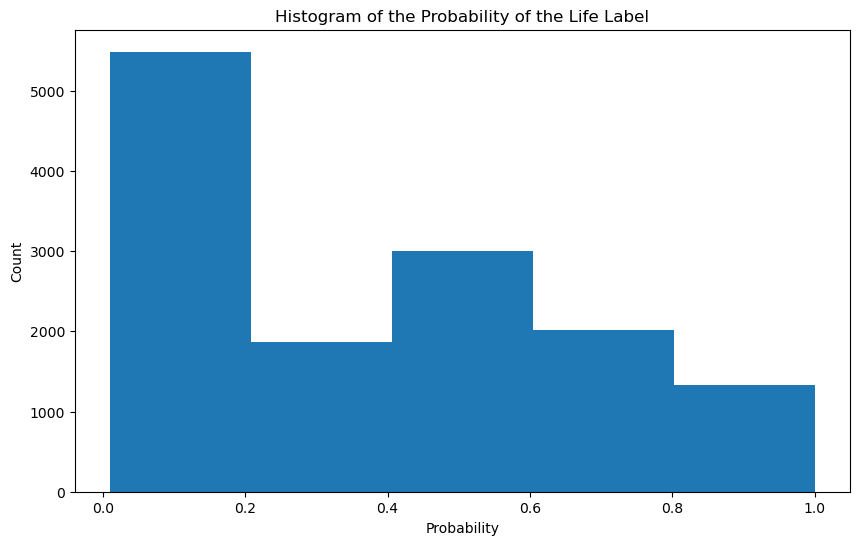

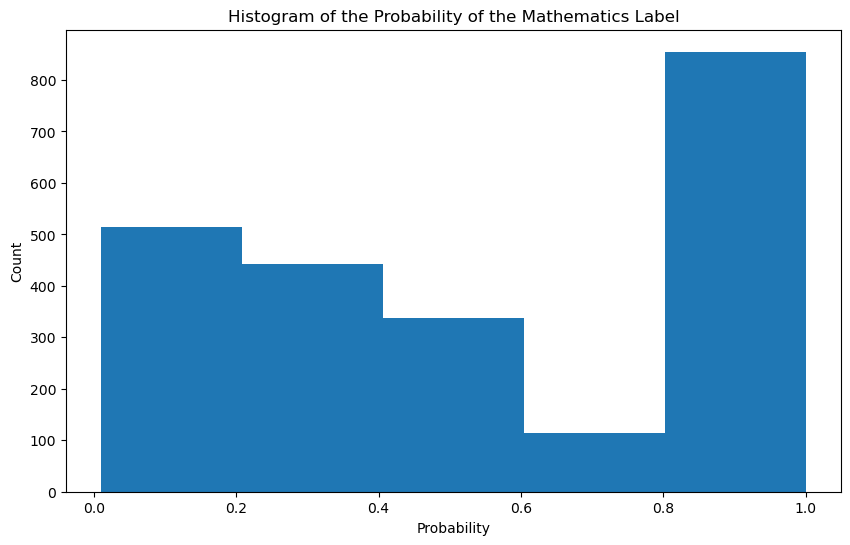

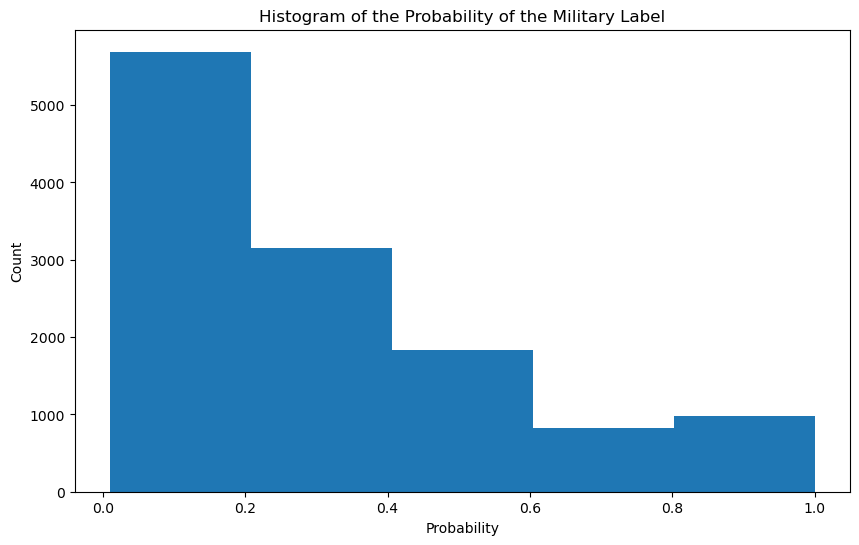

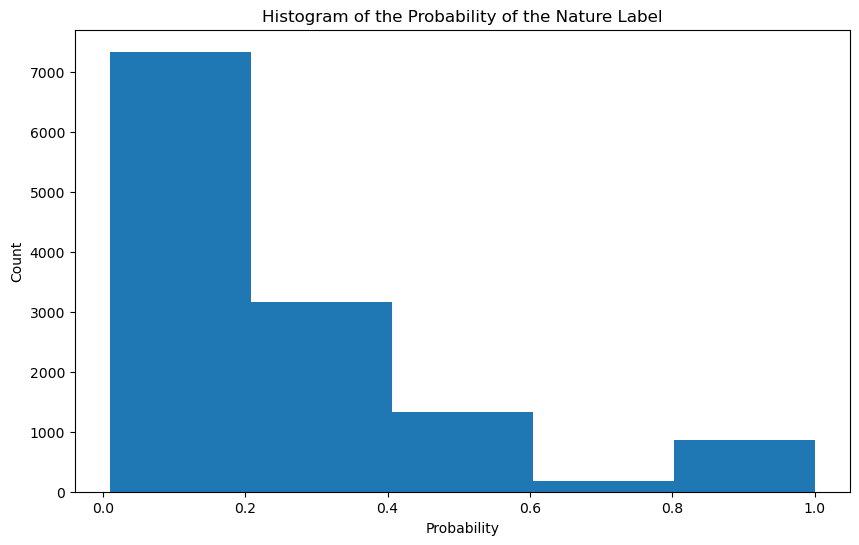

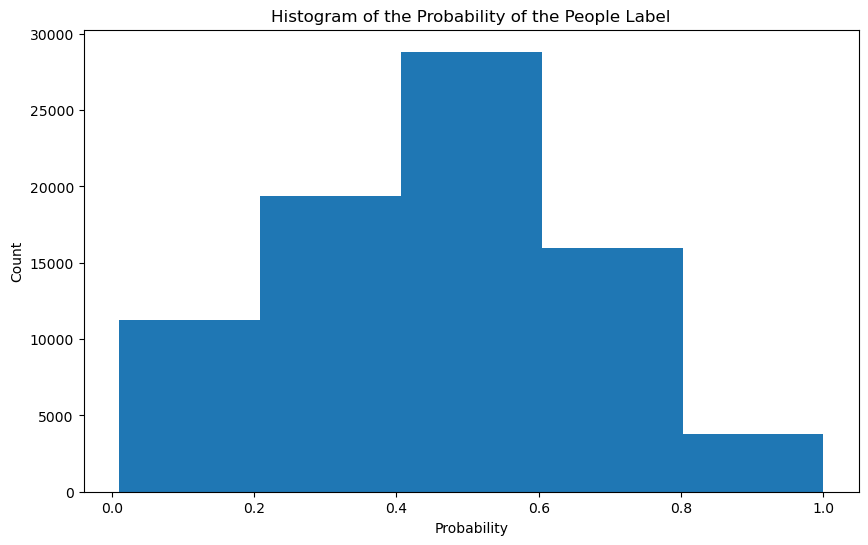

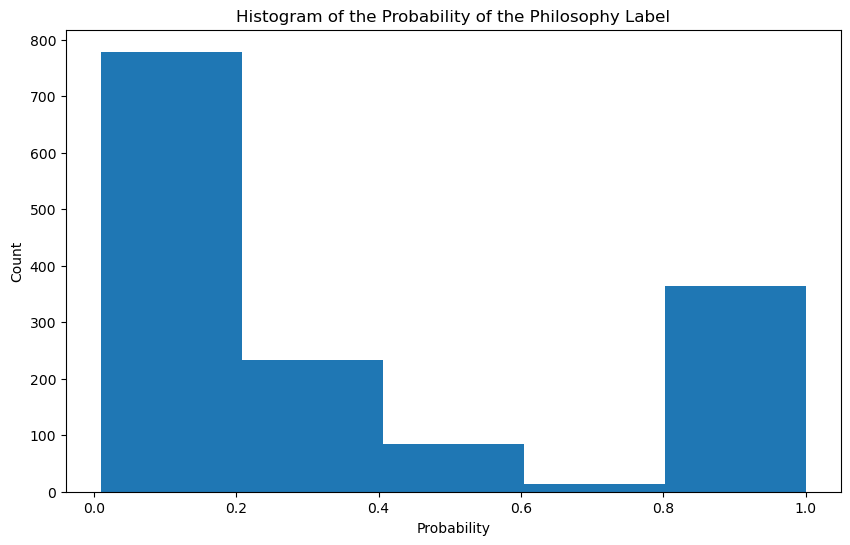

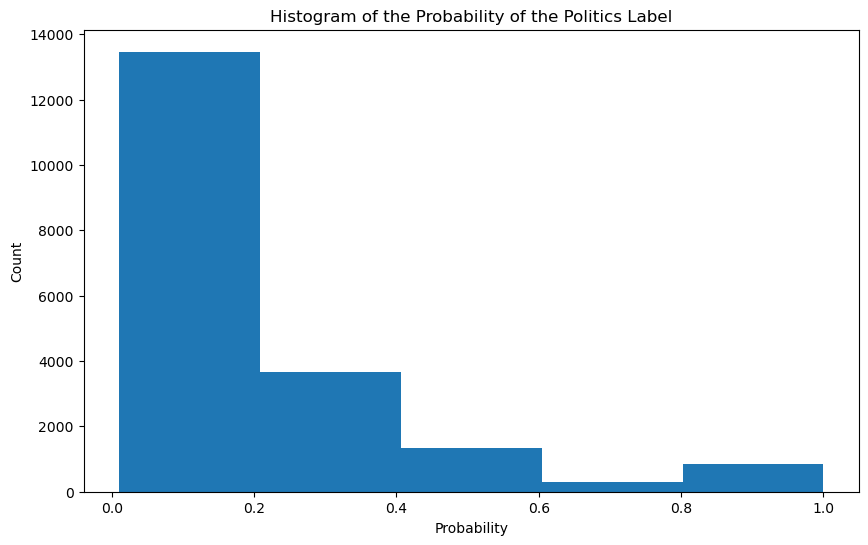

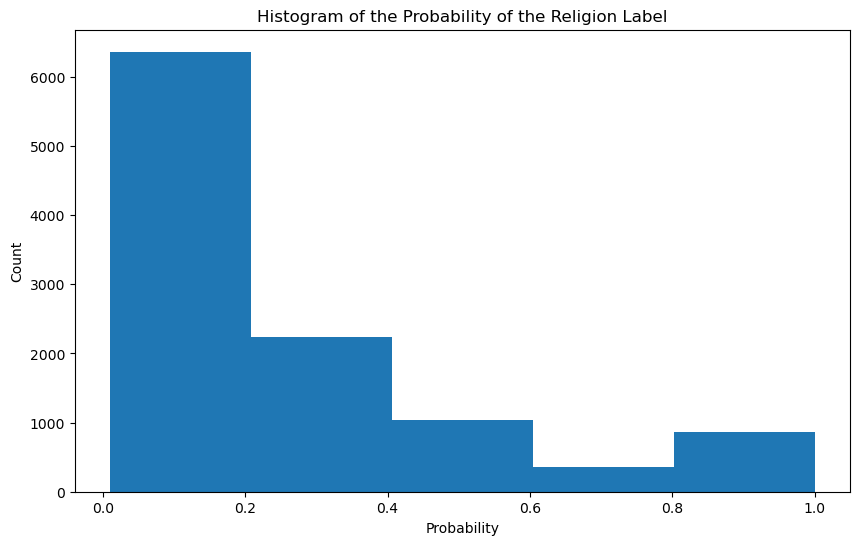

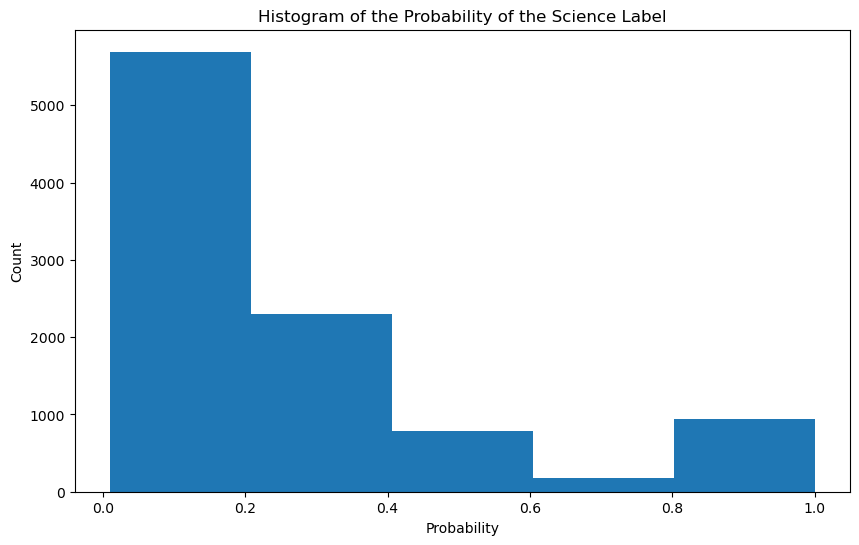

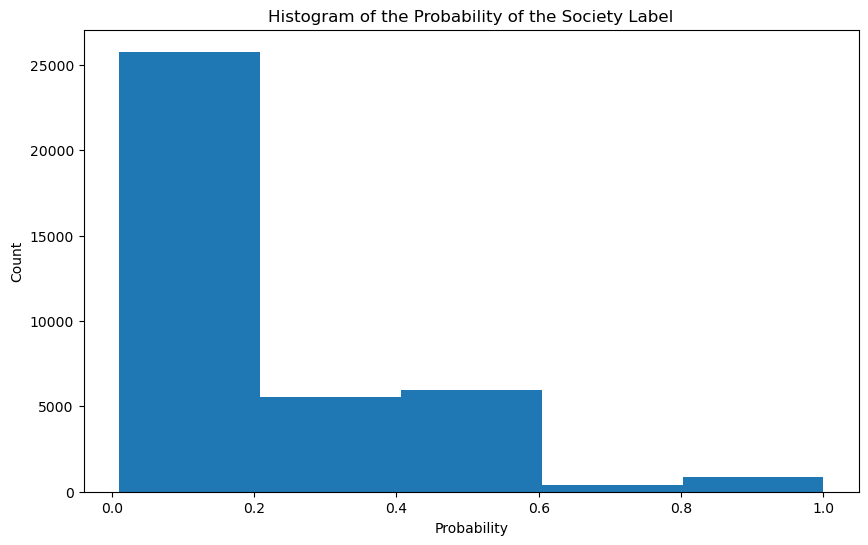

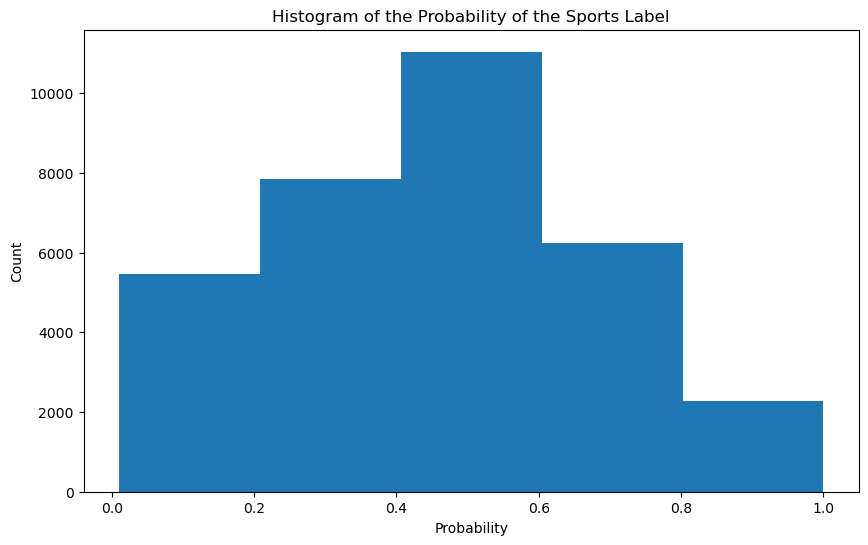

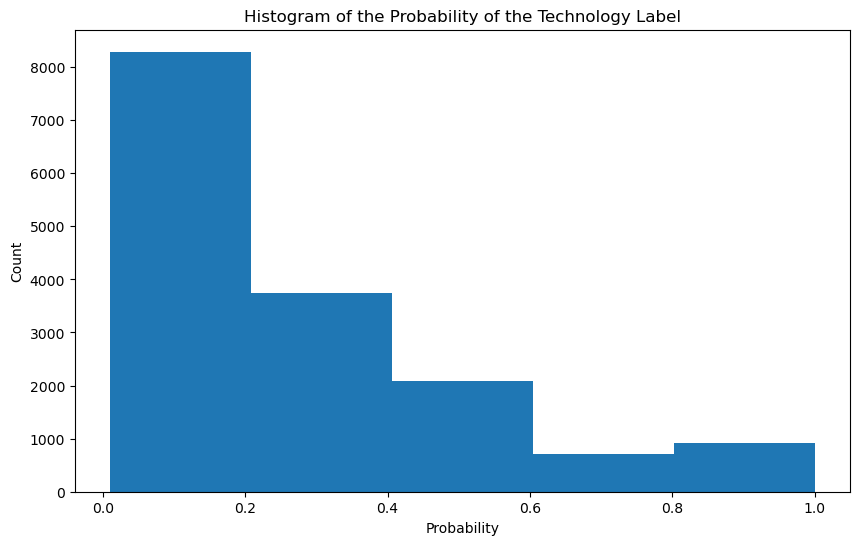

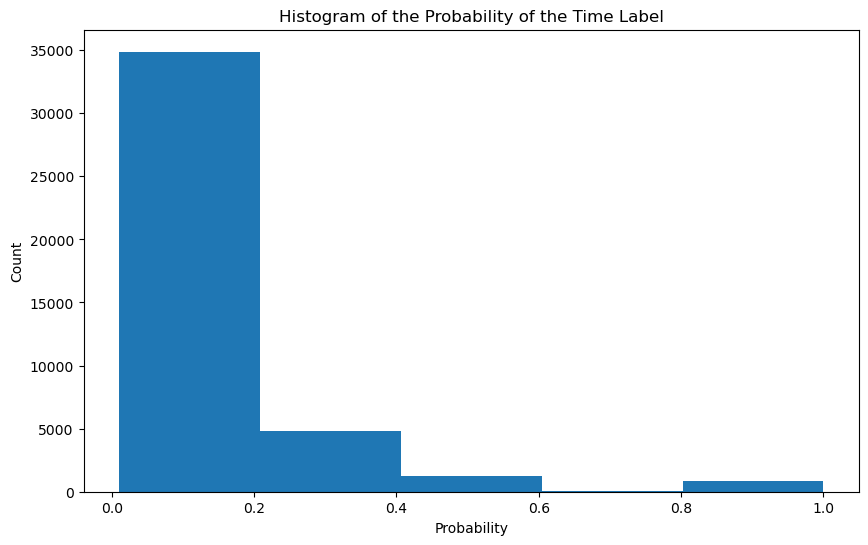

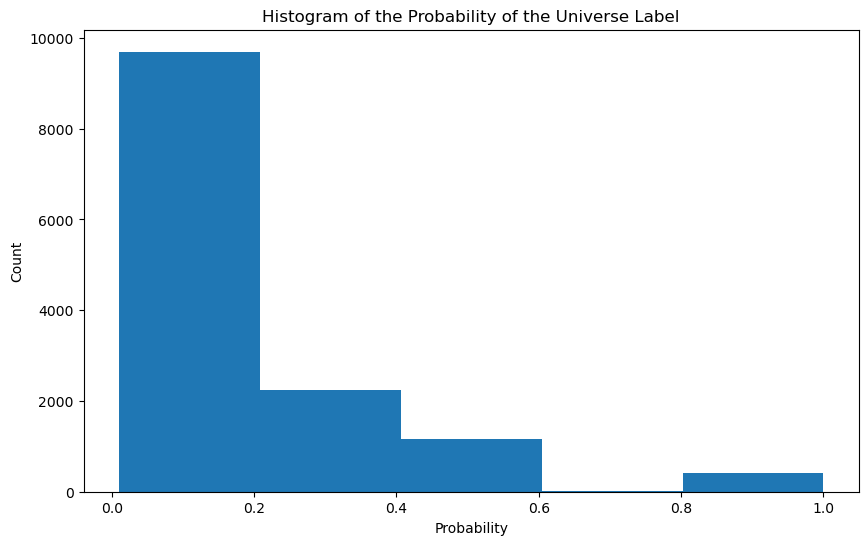

In [38]:
labels = df.iloc[0]['topics_with_percentages'].keys()

for i in labels:
    probs = labels_df[labels_df[i] > 0][i]

    # Plot a histogram of the probabilities
    plt.figure(figsize=(10, 6))
    plt.hist(probs, bins=5)
    plt.xlabel('Probability')
    plt.ylabel('Count')
    plt.title(f'Histogram of the Probability of the {str(i)} Label')
    plt.show()

## Single Topic Probabilty Range
Considering the selected labels in the rows that have a specific topics, looking at the probability of the selected label, we notice they are not always 1 and the minimum value is 0.9. This urges us to use a threshold of more than 0.1 (0.11 or 0.12 selected) for selecting labels.

In [52]:
selected_topic_prob = labels_df[df['topic'] != 'Mixed'].max(axis=1)
selected_topic_prob[selected_topic_prob < 1].shape[0]

670

In [53]:
selected_topic_prob[selected_topic_prob < 1].min()

0.9

## Mix Topic Probability Range

In [51]:
selected_topic_prob = labels_df[df['topic'] == 'Mixed'].max(axis=1)
selected_topic_prob.sort_values(ascending=False).head(5)

59289    0.89
4510     0.89
69034    0.89
36850    0.89
8490     0.89
dtype: float64

# Label Association

## Spearman Correlation, only Threshold

In [54]:
# if values are more than 0, then assign 1 to it
labels_df = labels_df.applymap(lambda x: 1 if x > 0.11 else 0)

# calculate phi coefficient
spearman_corr = labels_df.corr(method='spearman')

# flatten the matrix
spearman_corr = spearman_corr.stack().reset_index()

# set column names
spearman_corr.columns = ['Label 1', 'Label 2', 'spearman Coefficient']

# filter out the self-correlations
spearman_corr = spearman_corr[spearman_corr['Label 1'] != spearman_corr['Label 2']].sort_values(by='spearman Coefficient', ascending=False)

# remove duplicates
spearman_corr['sorted_labels'] = spearman_corr.apply(lambda x: tuple(sorted([x['Label 1'], x['Label 2']])), axis=1)
spearman_corr = spearman_corr.drop_duplicates('sorted_labels')

# drop the sorted_labels column
spearman_corr = spearman_corr.drop('sorted_labels', axis=1)

spearman_corr.head(20)

,Label 1,Label 2,spearman Coefficient
1460,Time,History,0.596791
1117,Nature,Life,0.454266
2,Entertainment,Mass_media,0.443567
584,Geography,Universe,0.366920
1166,People,Sports,0.272991
616,Government,Politics,0.247483
877,Knowledge,Humanities,0.237430
1340,Society,Geography,0.220041
743,Humanities,Mass_media,0.197129
426,Engineering,Technology,0.163036


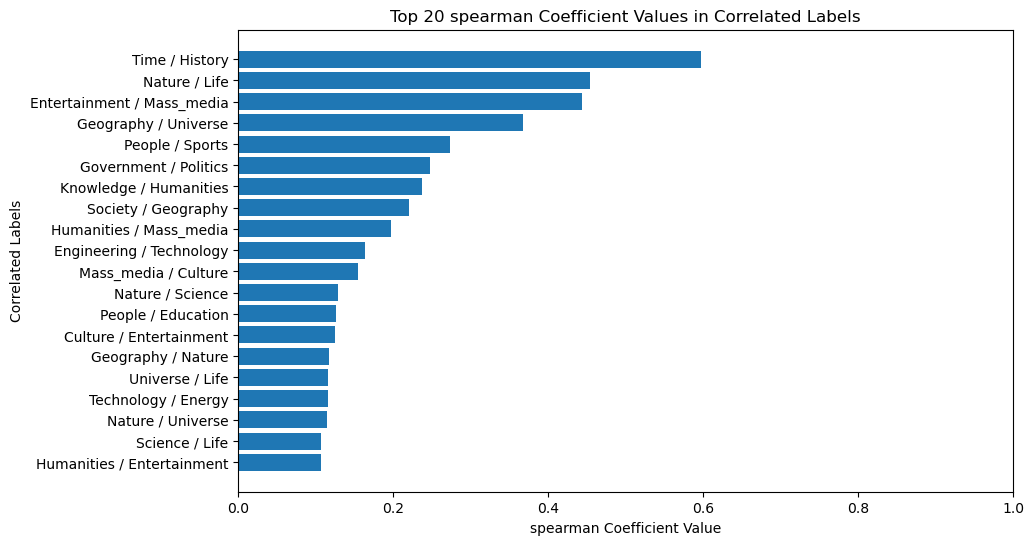

In [56]:
# Convert the tuples to strings
top_20_labels = spearman_corr.head(20)

#reverse the order of the rows
top_20_labels = top_20_labels.iloc[::-1]

# Create a bar plot of the R^2 values
plt.figure(figsize=(10, 6))
plt.barh(top_20_labels['Label 1'] + ' / ' + top_20_labels['Label 2'], top_20_labels['spearman Coefficient'])
plt.xlabel('spearman Coefficient Value')
plt.ylabel('Correlated Labels')
plt.xlim(0, 1)
plt.title('Top 20 spearman Coefficient Values in Correlated Labels')
plt.show()

Except some pairs, others have a low correlation value.

In [8]:
import random

# Copy the df dataframe into a new variable
df_copy = df.copy()

# Sample 100 random rows
sample_df = df_copy.sample(n=100, random_state=42)

# Print the first sentence of the text column
for row in range(len(sample_df)):
    first_sentence = sample_df.iloc[row]['text'].split('.')[0]
    # Print the row index and the first sentence of the text
    print(sample_df.iloc[row]['title'] + " : ")
    print(first_sentence)
    print()


Orchard Park High School, Croydon : 
  Orchard Park High School (formerly Edenham High School) is an 11–18 Mixed-sex education|mixed , secondary school and sixth form with Academy (English school)|academy status in Shirley, London|Shirley , Croydon , Greater London , England

Kąty, Gorlice County : 
  Kąty is a village in the administrative district of Gmina Biecz , within Gorlice County , Lesser Poland Voivodeship , in southern Poland

List of airports in Turkey : 
  This is a list of airport s in Turkey , sorted by location

Pete Bostwick : 
  George Herbert &quot;Pete&quot; Bostwick (August 14, 1909 – January 13, 1982) was an American real tennis|court tennis player, a steeplechase (horse racing)|steeplechase jockey and horse trainer , and an eight-goal polo player

Sione's Wedding (soundtrack) : 
  'Sione's Wedding' is the soundtrack to the New Zealand film, Sione's Wedding 

Branthwaite railway station : 
  Branthwaite railway station was built by the Whitehaven, Cleator and Egrem